In [1]:
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(11)                              # It's my lucky number
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
import itertools

import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
from keras.layers.normalization import batch_normalization
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.wrappers.scikit_learn import KerasClassifier
from keras.applications.resnet import ResNet50
from keras import backend as K 

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

In [5]:
print(os.listdir('C:/Users/karthik/Downloads/archive (1)/'))

['data', 'test', 'train']


In [6]:
folder_benign_train = 'C:/Users/karthik/Downloads/archive (1)/train/benign'
folder_malignant_train = 'C:/Users/karthik/Downloads/archive (1)/train/malignant'
# ....
folder_benign_test = 'C:/Users/karthik/Downloads/archive (1)/test/benign'
folder_malignant_test = 'C:/Users/karthik/Downloads/archive (1)/test/malignant'

read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

# Load in training pictures 
ims_benign = [read(os.path.join(folder_benign_train, filename)) for filename in os.listdir(folder_benign_train)]
X_benign = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_train, filename)) for filename in os.listdir(folder_malignant_train)]
X_malignant = np.array(ims_malignant, dtype='uint8')

# Load in testing pictures
ims_benign = [read(os.path.join(folder_benign_test, filename)) for filename in os.listdir(folder_benign_test)]
X_benign_test = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_test, filename)) for filename in os.listdir(folder_malignant_test)]
X_malignant_test = np.array(ims_malignant, dtype='uint8')

# Create labels
y_benign = np.zeros(X_benign.shape[0])
y_malignant = np.ones(X_malignant.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])


# Merge data 
X_train = np.concatenate((X_benign, X_malignant), axis = 0)
y_train = np.concatenate((y_benign, y_malignant), axis = 0)

X_test = np.concatenate((X_benign_test, X_malignant_test), axis = 0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)

# Shuffle data
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
y_train = y_train[s]

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
y_test = y_test[s]

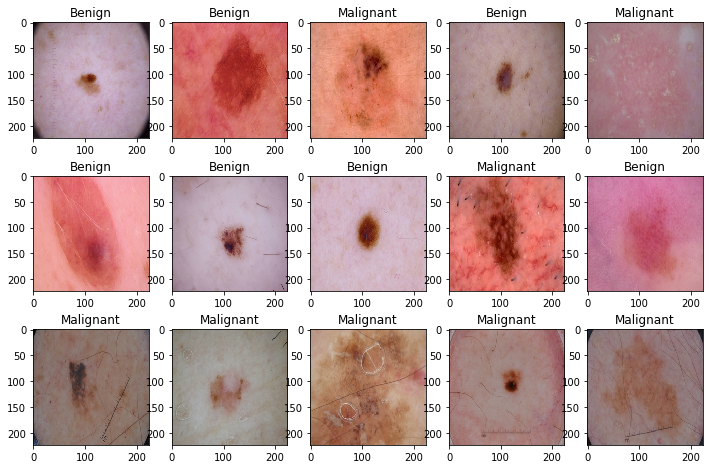

In [7]:
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

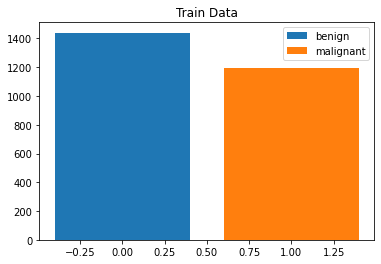

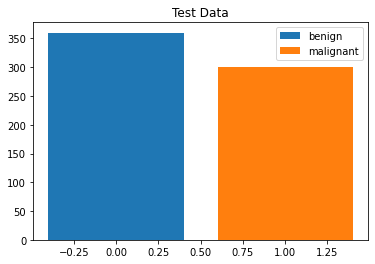

In [9]:
plt.bar(0, y_train[np.where(y_train == 0)].shape[0], label = 'benign')
plt.bar(1, y_train[np.where(y_train == 1)].shape[0], label = 'malignant')
plt.legend()
plt.title("Train Data")
plt.show()

plt.bar(0, y_test[np.where(y_test == 0)].shape[0], label = 'benign')
plt.bar(1, y_test[np.where(y_test == 1)].shape[0], label = 'malignant')
plt.legend()
plt.title("Test Data")
plt.show()

In [10]:
X_train = X_train/255.
X_test = X_test/255.

In [ ]:
from sklearn.svm import SVC

model = SVC()

model.fit(X_train.reshape(X_train.shape[0],-1), y_train)

SVC()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test.reshape(X_test.shape[0],-1))

print(accuracy_score(y_test, y_pred))

0.8405172413793104


In [11]:
# INCEPTIONV3 MODEL
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=1e-7)

In [12]:
y_train = to_categorical(y_train, num_classes= 2)
y_test = to_categorical(y_test, num_classes= 2)

In [13]:
from keras.applications.inception_v3 import InceptionV3

Epoch 1/35
33/33 - 522s - loss: 0.6221 - accuracy: 0.6842 - val_loss: 0.6913 - val_accuracy: 0.5360 - lr: 1.0000e-05 - 522s/epoch - 16s/step
Epoch 2/35
33/33 - 502s - loss: 0.4865 - accuracy: 0.7805 - val_loss: 0.7003 - val_accuracy: 0.5360 - lr: 1.0000e-05 - 502s/epoch - 15s/step
Epoch 3/35
33/33 - 497s - loss: 0.4161 - accuracy: 0.8042 - val_loss: 0.7346 - val_accuracy: 0.5360 - lr: 1.0000e-05 - 497s/epoch - 15s/step
Epoch 4/35
33/33 - 523s - loss: 0.3962 - accuracy: 0.8108 - val_loss: 0.7881 - val_accuracy: 0.5360 - lr: 1.0000e-05 - 523s/epoch - 16s/step
Epoch 5/35
33/33 - 526s - loss: 0.3581 - accuracy: 0.8321 - val_loss: 0.8784 - val_accuracy: 0.5360 - lr: 1.0000e-05 - 526s/epoch - 16s/step
Epoch 6/35

Epoch 6: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
33/33 - 504s - loss: 0.3469 - accuracy: 0.8435 - val_loss: 1.0767 - val_accuracy: 0.5360 - lr: 1.0000e-05 - 504s/epoch - 15s/step
Epoch 7/35
33/33 - 367s - loss: 0.3299 - accuracy: 0.8549 - val_loss: 1.3155 

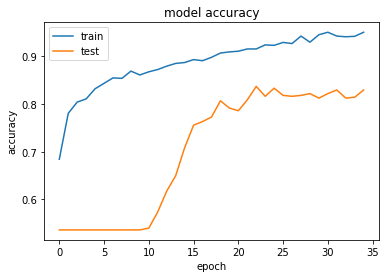

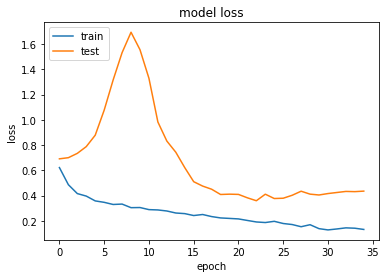

In [15]:
input_shape = (224,224,3)
lr = 0.00001
epochs = 35
batch_size = 64

model = InceptionV3(include_top=True,
                 weights= None,
                 input_tensor=None,
                 input_shape=input_shape,
                 pooling='avg',
                 classes=2)

model.compile(optimizer = Adam(lr) ,
              loss = "binary_crossentropy", 
              metrics=["accuracy"])

history = model.fit(X_train, y_train, validation_split=0.2,
                    epochs= epochs, batch_size= batch_size, verbose=2, 
                    callbacks=[learning_rate_reduction]
                   )

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()